In [1]:
import seaborn as sns 
import pandas  as pd
import numpy as np

In [2]:
df= pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                  'sun':np.tile(np.repeat(['low', 'medium', 'high'],5), 2),
                  'height':[5,5,6,4,7,5,5,6,5,3,
                            3,4,3,5,8,6,9,3,2,6,
                            3,3,5,5,5,4,4,8,8,7,]})

In [3]:
df.sample(10)

,water,sun,height
21,weekly,medium,3
5,daily,medium,5
14,daily,high,8
27,weekly,high,8
18,weekly,low,2
13,daily,high,5
22,weekly,medium,5
1,daily,low,5
2,daily,low,6
3,daily,low,4


c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

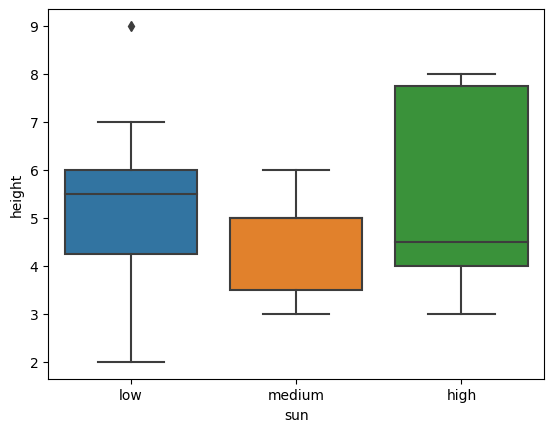

In [4]:
sns.boxplot(df['sun'], df['height'], )

c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

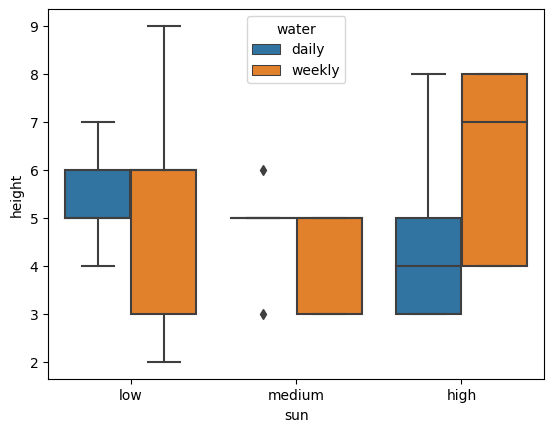

In [6]:
sns.boxplot(df['sun'], df['height'], hue= df['water'])

In [12]:
df.shape

(30, 3)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 
# one way AVOVA
model= ols('height ~ sun', data= df).fit()
sm.stats.anova_lm(model, type= 2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,4.866667,2.433333,0.755172,0.479598
Residual,27.0,87.000000,3.222222,NaN,NaN


In [6]:
# Two way ANOVA
model= ols('height ~ C(sun) + C(water) +C(sun):C(water)', data= df).fit()
sm.stats.anova_lm(model, type= 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,4.866667,2.433333,0.733668,0.490606
C(water),1.0,0.533333,0.533333,0.160804,0.691965
C(sun):C(water),2.0,6.866667,3.433333,1.035176,0.370486
Residual,24.0,79.600000,3.316667,NaN,NaN


In [7]:
# Another Way of doing ANOVA
import pingouin as pg
mol= pg.anova(data= df, dv= 'height', between=['sun', 'water'], detailed=True)
mol

,Source,SS,DF,MS,F,p-unc,np2
0,sun,4.866667,2,2.433333,0.733668,0.490606,0.057616
1,water,0.533333,1,0.533333,0.160804,0.691965,0.006656
2,sun * water,6.866667,2,3.433333,1.035176,0.370486,0.079414
3,Residual,79.600000,24,3.316667,NaN,NaN,NaN


c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\haier\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Tukey test 

It is post hoc test. It is use when variance of means are not equal.  

In [9]:
pt= pg.pairwise_tukey(data= df, dv= 'height', between=['sun', 'water'])
print(pt)

ValueError: Data must be 1-dimensional

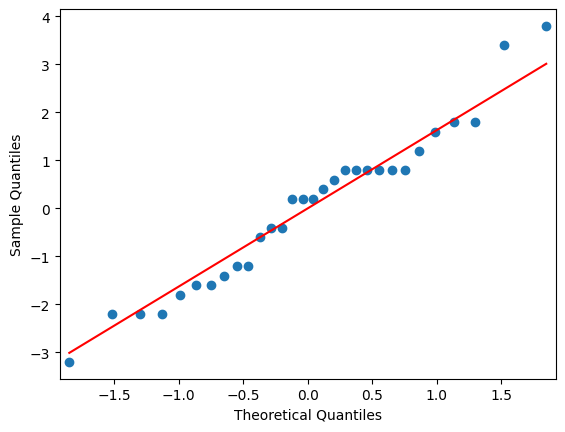

In [19]:
# pp plot
res= model.resid
fig= sm.qqplot(res, line='s')